## Sales analysis
### In this notebook, sales data has been explored and analyzed. The data contains sales details of different games. Various attributes like genres, frequency of game release, share on platforms, etc are visualized.


In [1]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport as pr

In [64]:
# Reading data
df = pd.read_csv('vgsales.csv')
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [3]:
# looking for null values
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [5]:
#Dropping null values
df.dropna(inplace = False)
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [11]:
print(df.shape)

(16291, 11)


In [12]:
#checking data types
df.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [19]:
# to checkk any particular row for instance last row.
df.iloc[-1]

Rank                       16600
Name            Spirits & Spells
Platform                     GBA
Year                        2003
Genre                   Platform
Publisher                Wanadoo
NA_Sales                    0.01
EU_Sales                       0
JP_Sales                       0
Other_Sales                    0
Global_Sales                0.01
Name: 16597, dtype: object

In [53]:
# Sorting by global sales
df.sort_values(by = ['Global_Sales'], ascending = True).tail(20)
#df.sort_values(by = ['Year','Global_Sales'], ascending = False).head(20) #Sorting by global sales and year

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
19,20,Brain Age: Train Your Brain in Minutes a Day,DS,2020.0,Misc,Nintendo,4.75,9.26,4.16,2.05,20.22
18,19,Super Mario World,SNES,2020.0,Platform,Nintendo,12.78,3.75,3.54,0.55,20.61
17,18,Grand Theft Auto: San Andreas,PS2,2020.0,Action,Take-Two Interactive,9.43,0.40,0.41,10.57,20.81
16,17,Grand Theft Auto V,PS3,2020.0,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40
15,16,Kinect Adventures!,X360,2020.0,Misc,Microsoft Game Studios,14.97,4.94,0.24,1.67,21.82
14,15,Wii Fit Plus,Wii,2020.0,Sports,Nintendo,9.09,8.59,2.53,1.79,22.00
13,14,Wii Fit,Wii,2020.0,Sports,Nintendo,8.94,8.03,3.60,2.15,22.72
12,13,Pokemon Gold/Pokemon Silver,GB,2020.0,Role-Playing,Nintendo,9.00,6.18,7.20,0.71,23.10
11,12,Mario Kart DS,DS,2020.0,Racing,Nintendo,9.81,7.57,4.13,1.92,23.42
10,11,Nintendogs,DS,2020.0,Simulation,Nintendo,9.07,11.00,1.93,2.75,24.76


In [66]:
# sorting by highest global sales per game.
df.groupby(['Name'])['Global_Sales'].sum().sort_values(ascending=False)[:40]

Name
Wii Sports                                      82.74
Grand Theft Auto V                              55.92
Super Mario Bros.                               45.31
Tetris                                          35.84
Mario Kart Wii                                  35.82
Wii Sports Resort                               33.00
Pokemon Red/Pokemon Blue                        31.37
Call of Duty: Black Ops                         31.03
Call of Duty: Modern Warfare 3                  30.83
New Super Mario Bros.                           30.01
Call of Duty: Black Ops II                      29.72
Wii Play                                        29.02
New Super Mario Bros. Wii                       28.62
Duck Hunt                                       28.31
Call of Duty: Ghosts                            27.38
Super Mario World                               26.07
Call of Duty: Black Ops 3                       25.32
Call of Duty: Modern Warfare 2                  25.09
Nintendogs             

In [96]:
# Sorting by row values.
action_genre = df['Genre']== 'Action'
df[action_genre].head(8)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16,17,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40
17,18,Grand Theft Auto: San Andreas,PS2,2004.0,Action,Take-Two Interactive,9.43,0.40,0.41,10.57,20.81
23,24,Grand Theft Auto V,X360,2013.0,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38
24,25,Grand Theft Auto: Vice City,PS2,2002.0,Action,Take-Two Interactive,8.41,5.49,0.47,1.78,16.15
38,39,Grand Theft Auto III,PS2,2001.0,Action,Take-Two Interactive,6.99,4.51,0.30,1.30,13.10
44,45,Grand Theft Auto V,PS4,2014.0,Action,Take-Two Interactive,3.80,5.81,0.36,2.02,11.98
45,46,Pokemon HeartGold/Pokemon SoulSilver,DS,2009.0,Action,Nintendo,4.40,2.77,3.96,0.77,11.90
51,52,Grand Theft Auto IV,X360,2008.0,Action,Take-Two Interactive,6.76,3.10,0.14,1.03,11.02


In [97]:
# Demonstration of sorting by multiple row/column values
year_action = df['Year']== 2006.0
actionin2006 = df[action_genre & year_action]
actionin2006.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
100,101,The Legend of Zelda: Twilight Princess,Wii,2006.0,Action,Nintendo,3.83,2.19,0.60,0.70,7.31
198,199,Grand Theft Auto: Vice City Stories,PSP,2006.0,Action,Take-Two Interactive,1.70,2.02,0.16,1.21,5.08
360,361,Grand Theft Auto: Liberty City Stories,PS2,2006.0,Action,Take-Two Interactive,1.56,1.40,0.07,0.50,3.54
556,557,LEGO Star Wars II: The Original Trilogy,PS2,2006.0,Action,LucasArts,1.85,0.64,0.01,0.19,2.69
569,570,Hannah Montana,DS,2006.0,Action,Disney Interactive Studios,1.59,0.80,0.00,0.26,2.65


<AxesSubplot:>

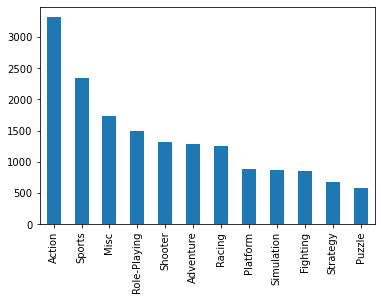

In [99]:
#Total value count for genres.
df.Genre.value_counts().plot.bar()

Text(0.5, 1.0, 'Max Global_Sales of games')

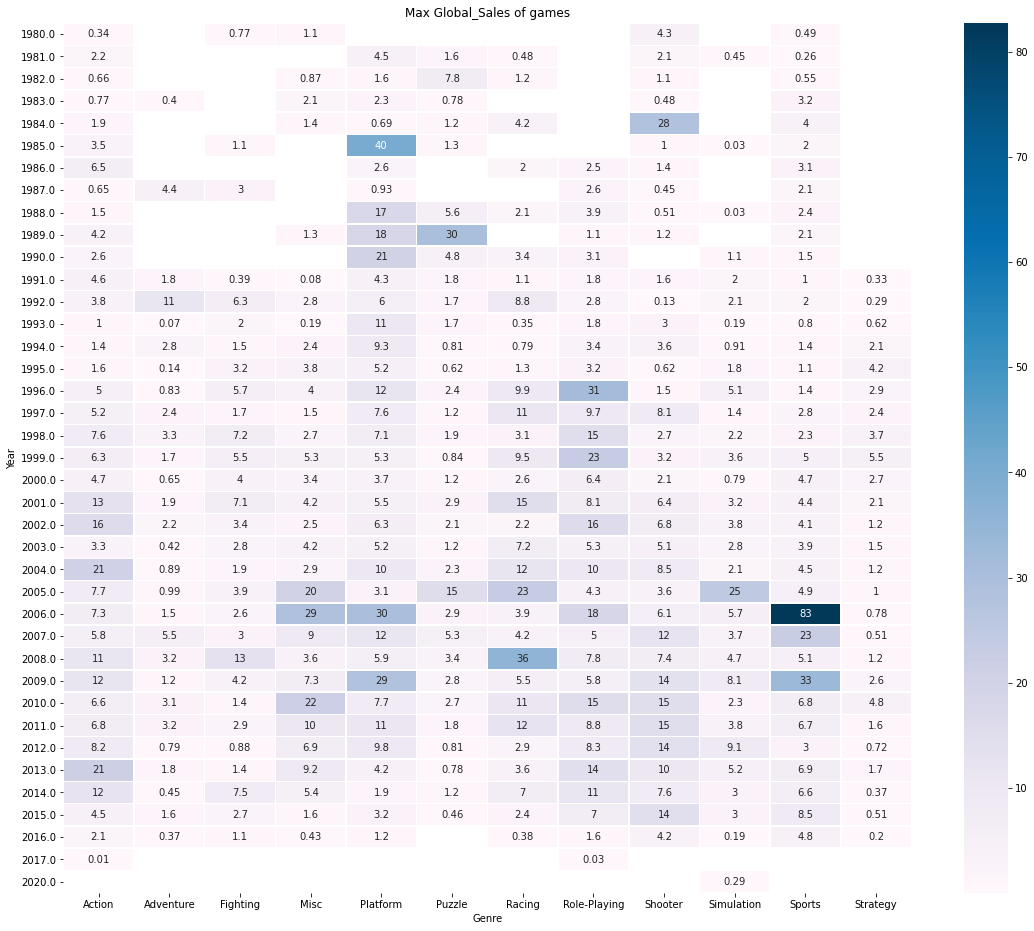

In [98]:
sales_games = pd.pivot_table(df,values=['Global_Sales'],index=['Year'],columns=['Genre'],aggfunc='max',margins=False)

plt.figure(figsize=(19,16))
sb.heatmap(sales_games['Global_Sales'],linewidths=.5,annot=True,vmin=0.01,cmap='PuBu')
plt.title('Max Global_Sales of games')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38]),
 [Text(0, 0, '1980.0'),
  Text(1, 0, '1981.0'),
  Text(2, 0, '1982.0'),
  Text(3, 0, '1983.0'),
  Text(4, 0, '1984.0'),
  Text(5, 0, '1985.0'),
  Text(6, 0, '1986.0'),
  Text(7, 0, '1987.0'),
  Text(8, 0, '1988.0'),
  Text(9, 0, '1989.0'),
  Text(10, 0, '1990.0'),
  Text(11, 0, '1991.0'),
  Text(12, 0, '1992.0'),
  Text(13, 0, '1993.0'),
  Text(14, 0, '1994.0'),
  Text(15, 0, '1995.0'),
  Text(16, 0, '1996.0'),
  Text(17, 0, '1997.0'),
  Text(18, 0, '1998.0'),
  Text(19, 0, '1999.0'),
  Text(20, 0, '2000.0'),
  Text(21, 0, '2001.0'),
  Text(22, 0, '2002.0'),
  Text(23, 0, '2003.0'),
  Text(24, 0, '2004.0'),
  Text(25, 0, '2005.0'),
  Text(26, 0, '2006.0'),
  Text(27, 0, '2007.0'),
  Text(28, 0, '2008.0'),
  Text(29, 0, '2009.0'),
  Text(30, 0, '2010.0'),
  Text(31, 0, '2011.0'),
  Text(32, 0, '2012.0'),
  T

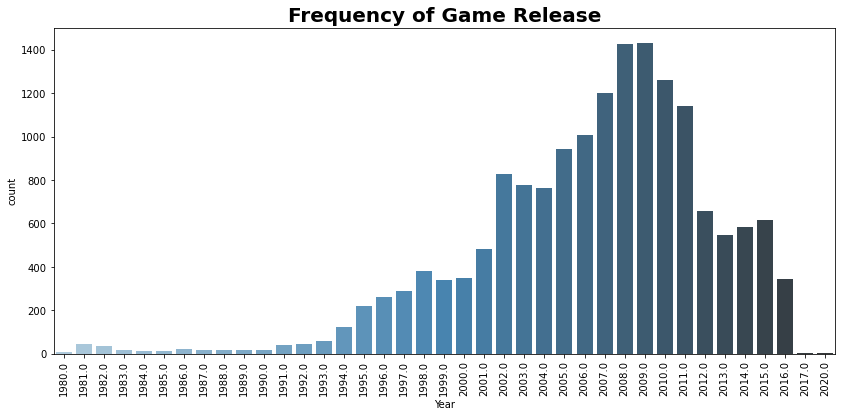

In [87]:
# checking for frequency of game release.
plt.subplots(figsize=(14, 6))
sb.countplot(x=df["Year"], palette="Blues_d", data=df)
plt.title("Frequency of Game Release", fontweight="bold", fontsize=20)
plt.xticks(rotation=90)


<AxesSubplot:ylabel='Platform'>

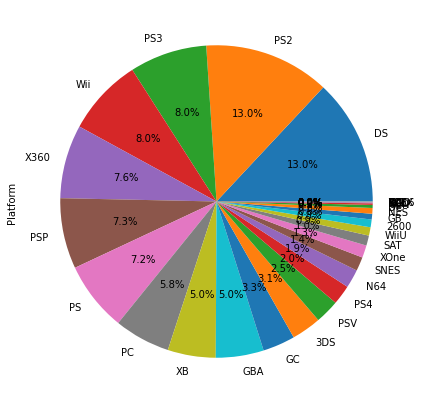

In [84]:
# percent share of different platforms.
plt.figure(figsize = (7,17))
df.Platform.value_counts().plot.pie(autopct='%1.1f%%')

<AxesSubplot:xlabel='Platform', ylabel='count'>

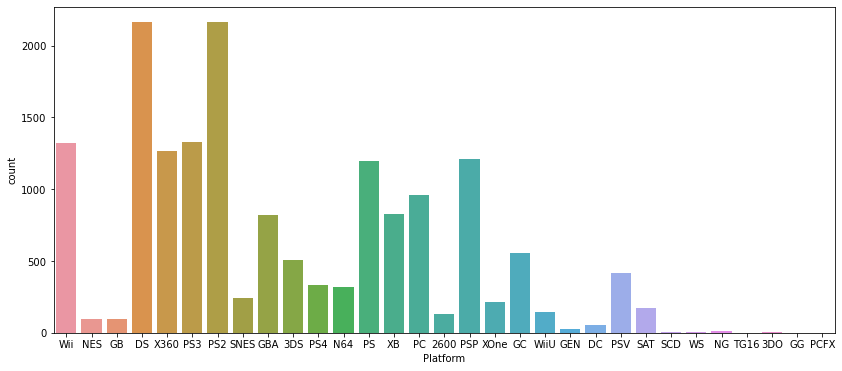

In [100]:
plt.figure(figsize= (14,6))
sb.countplot(x=df["Platform"])

In [69]:
# Top 30 company sales, 
def zone_sells(groupobj):
    sales = df.groupby([groupobj])["Global_Sales", "NA_Sales" ,"EU_Sales" ,"JP_Sales", "Other_Sales"].sum().sort_values("Global_Sales", ascending=False)[:30]
    sales_ = pd.DataFrame(sales)
    sales_.plot(kind="bar", width = 0.9, figsize=(25,7))
    plt.title(f"{groupobj} selling zone", fontweight="bold")

<ipython-input-69-2fc6150e59a6>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sales = df.groupby([groupobj])["Global_Sales", "NA_Sales" ,"EU_Sales" ,"JP_Sales", "Other_Sales"].sum().sort_values("Global_Sales", ascending=False)[:30]


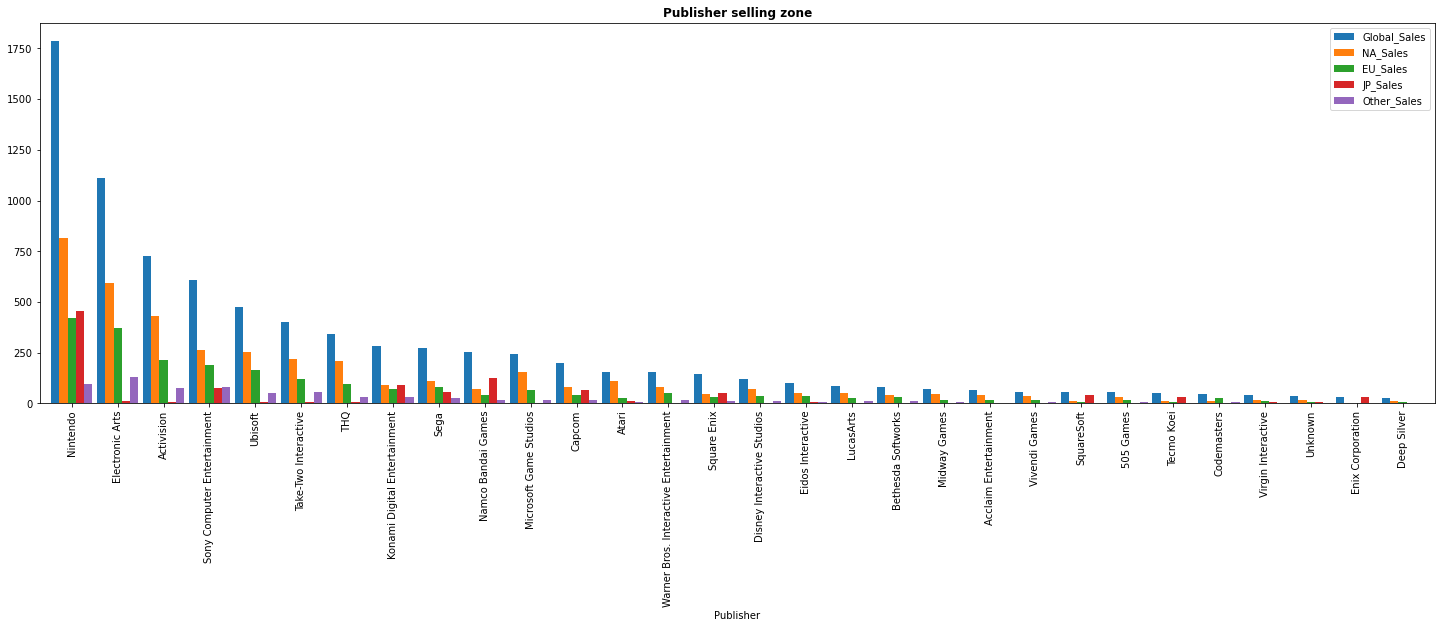

In [70]:
zone_sells('Publisher')

<ipython-input-69-2fc6150e59a6>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sales = df.groupby([groupobj])["Global_Sales", "NA_Sales" ,"EU_Sales" ,"JP_Sales", "Other_Sales"].sum().sort_values("Global_Sales", ascending=False)[:30]


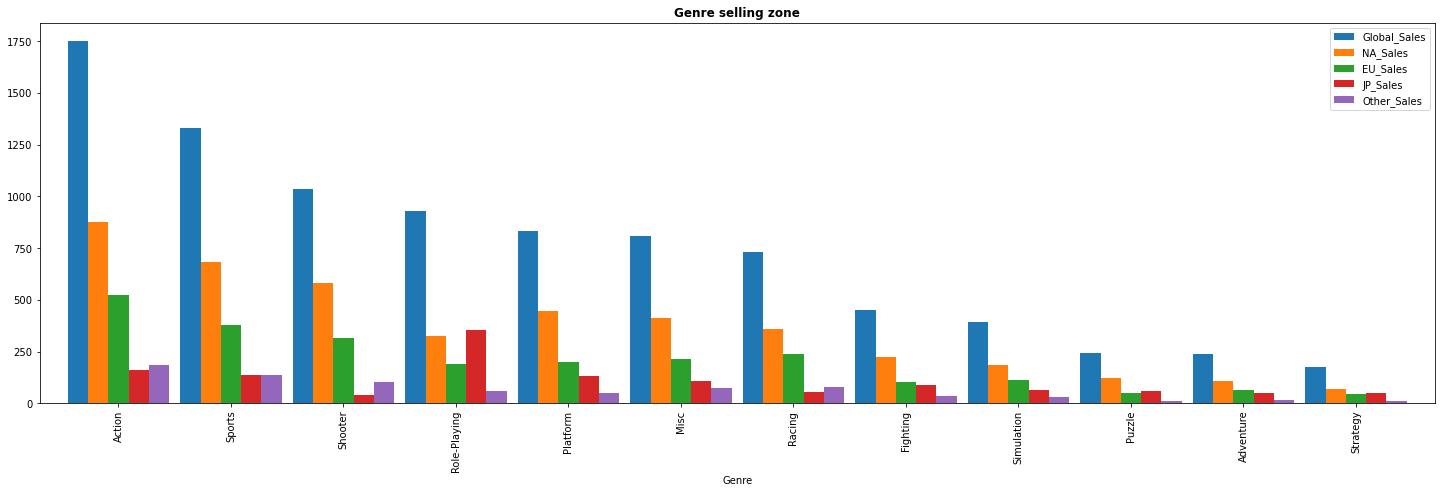

In [71]:
zone_sells("Genre")

<ipython-input-69-2fc6150e59a6>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sales = df.groupby([groupobj])["Global_Sales", "NA_Sales" ,"EU_Sales" ,"JP_Sales", "Other_Sales"].sum().sort_values("Global_Sales", ascending=False)[:30]


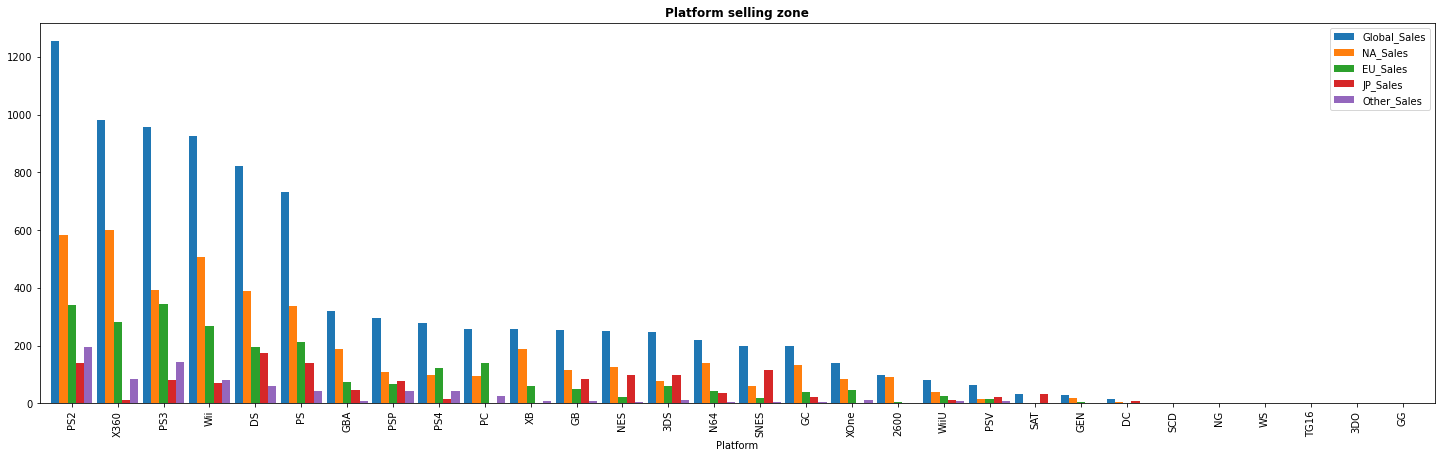

In [86]:
zone_sells("Platform")